
## 01MIAR - Actividad Video Valencia Pollution

## NumPy y Pandas

### Objetivos:
- Aplicar diferentes técnicas de tratamiento de estructuras numéricas con Numpy y datos estructurados con Pandas.

### Instrucciones:
- Mantener una estructura limpia, comentando código y secuenciando los apartados con el código correspondiente que resuelva la actividad.
- Como criterio de evaluación se tendrá en cuenta el resultado, la consecución del mismo, estilo, comentarios y adecuación. Siempre será tenido en cuenta cualquier detalle técnico avanzado o no visto en clase relacionado con el tema (explicar el porqué y usabilidad).
- No está permitido compartir los resultados ni el código en ninguno de los foros.
- Revisar los temas así como las sesiones sobre Numpy y Pandas para aplicar dichos contenidos.
- Proponer las respuestas en las celdas a dicho efecto en cada punto, si se necesitan más celdas añadirlas en su sitio correspondiente
- Mostrar de manera clara la respuesta a las preguntas, mediante código

### Entrega:
- Este mismo notebook con las respuetas

### Evaluación
- Esta actividad corresponde con el 10% de la nota final de la asignatura.

### Fecha Realización
- Convocatoria 1 - 29/11/2024 00:00 - 29/11/2024 23:59

#### Descripción
El conjunto de datos "valencia_pollution_dataset.csv" (fichero disponible adjunto a la actividad) proviene de una descarga de datos del servicio web del ayuntamiento de la ciudad de Valencia de datos abiertos.

Los datos recabados de este servicio web son de mediciones cada hora de una serie de estaciones de contaminación atmosférica.

https://valencia.opendatasoft.com/explore/dataset/estacions-contaminacio-atmosferiques-estaciones-contaminacion-atmosfericas/information/

Cada estación realiza una serie de mediciones acerca de la calidad del aire, y de ciertas sustancias que se consideran importantes para analizar la contaminación atmosférica en la ciudad.

#### Columnas para trabajar:
- objectid: id de la estación
- nombre: nombre de la estación
- dirección: dirección de la estación
- tipozona: tipo de la zona, urbana o sub urbana
- parámetros: parámetroe medidos
- mediciones: fichero de mediciones
- tipoemision: tráfico o fondo
- so2: niveles de dióxido de azufre
- no2: niveles de dióxido de nitrogeno
- o3: niveles de ozono
- co: niveles de monóxido de carbono
- pm10: niveles de partículas en suspensión hasta 10um
- pm25: niveles de partículas en suspensión hasta 2,5um
- fecha_carga: timestamp de la actualización de los datos
- calidad_ambiental: estimación de la calidad del aire
- fiwareid:
- geo_shape: coordenadas geográficas
- geo_point_2d: latitud-longitud

In [1]:
# Importa librerias
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns


## 01
Carga de datos de csv (valencia_pollution_dataset.csv) en un DataFrame

In [2]:
# Carga de csv a un dataframe
df=pd.read_csv('valencia_pollution_dataset.csv')
df.head()

,objectid,nombre,direccion,tipozona,parametros,mediciones,so2,no2,o3,co,pm10,pm25,tipoemision,fecha_carga,calidad_ambiental,fiwareid,geo_shape,geo_point_2d
0,26,Pista de Silla,"C/ Filipinas, s/n",Urbana,NaN,NaN,0.0,10,71.0,0.7,8.0,3.0,Tráfico,2025-05-24T20:20:06+00:00,Razonablemente Buena,NaN,NaN,NaN
1,28,Viveros,Jardines de Viveros,Urbana,NaN,NaN,0.0,5,88.0,NaN,NaN,NaN,Fondo,2025-05-24T20:20:08+00:00,Razonablemente Buena,NaN,NaN,NaN
2,431,Olivereta,Av. del Cid amb Av. de les Tres Creus,Urbana,NaN,NaN,NaN,24,NaN,NaN,20.0,11.0,Tráfico,2025-05-24T20:20:11+00:00,Razonablemente Buena,NaN,NaN,NaN
3,432,Patraix,"Archiduque Carlos, 84ac",Urbana,NaN,NaN,NaN,15,NaN,NaN,20.0,11.0,Tráfico,2025-05-24T20:20:12+00:00,Razonablemente Buena,NaN,NaN,NaN
4,23,Francia,"Avda. de Francia, 60",Urbana,NaN,NaN,1.0,3,82.0,0.1,9.0,6.0,Tráfico,2025-05-24T20:20:04+00:00,Razonablemente Buena,NaN,NaN,NaN


## 02
- ¿Cuál es el rango temporal del dataset?
- Obtención del número de estaciones que tienen un sensor para medir monóxido de carbono

In [8]:
#  Tranforma el campo fecha_carga a datetime
df['fecha_carga']=pd.to_datetime(df['fecha_carga'], errors='coerce')
#  Calculo de rango temporal del dataset
min_fecha=df['fecha_carga'].min().strftime('%Y-%m-%d %H:%M')
max_fecha=df['fecha_carga'].max().strftime('%Y-%m-%d %H:%M')
cant_sensor_co=df.groupby('nombre', as_index=False)['co'].count().query("co > 0")['nombre'].count()
print(f'Rango de Fecha  del dataset es : {min_fecha} hasta {max_fecha}')
print(f'Número de estaciones que tienen sensor de co : {cant_sensor_co}')




Rango de Fecha  del dataset es : 2025-05-24 20:20 hasta 2025-05-26 10:20
Número de estaciones que tiene sensor de co : 3


## 03

- Número de estación con la media más alta de mediciones de monóxido de carbono

In [4]:
# Your solution here...
estacion_media_alta=df.dropna(subset=['objectid', 'co']).groupby('objectid')['co'].mean().sort_values(ascending=False).index[0]
print(f'Número de la estación con la media más alta de mediciones de monóxido de carbono: {estacion_media_alta}')

Número de la estación con la media más alta de mediciones de monóxido de carbono: 26


## 04
Realizar el histograma de dióxido de nitrógeno de la estación del punto anterior

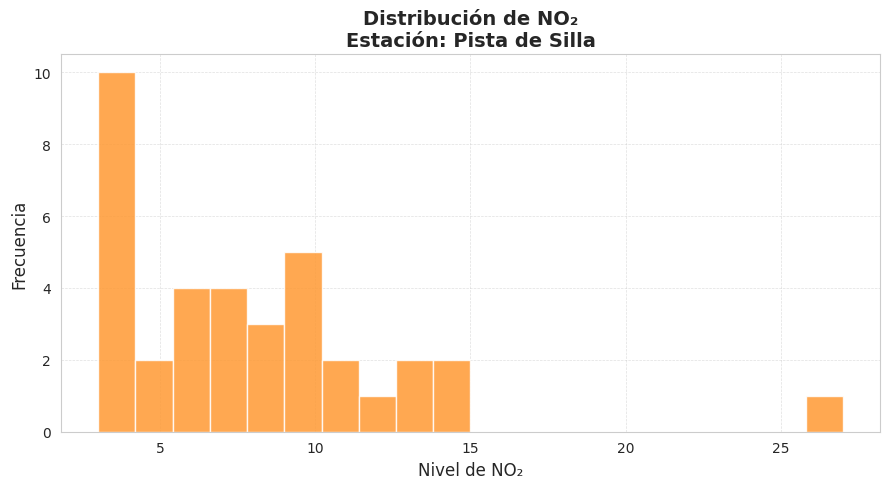

In [5]:
# Filtrado de la  estación anterior
df_estacion = df[df['objectid'] == estacion_media_alta]
nombre_estacion_media_alta = df_estacion['nombre'].iloc[0]

# Eliminar valores nulos de NO₂
no2_values = df_estacion['no2'].dropna()

# Estilo visual con la libreria seaborn
sns.set_style("whitegrid")
plt.figure(figsize=(9, 5))

# 4. Crear histograma con estilo bonito
plt.hist(no2_values, bins=20, color='#FF9933', edgecolor='white', alpha=0.85)

# 5. Personalización estética
plt.title(f'Distribución de NO₂\nEstación: {nombre_estacion_media_alta}', fontsize=14, fontweight='bold')
plt.xlabel('Nivel de NO₂', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.6)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# 6. Ajustes de layout
plt.tight_layout()
plt.show()

## 05
Realizar gráfica con  la línea temporal de las mediciones de ozono de la estación del punto anterior. Pista, la columna 'fecha_carga' habría que cambiarla de tipo.

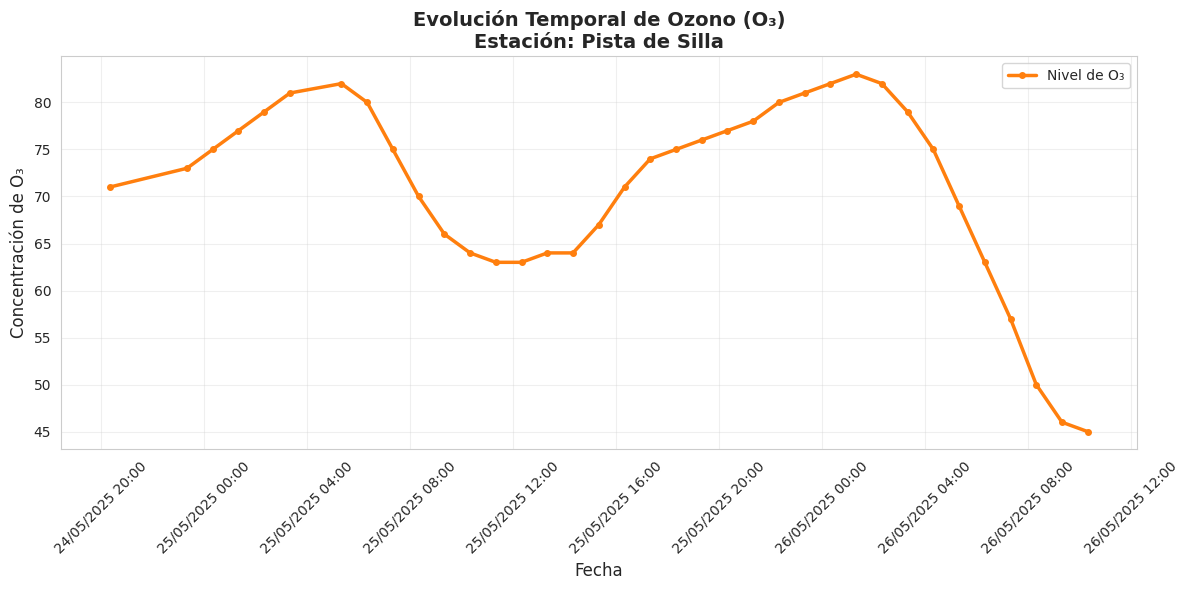

In [6]:
# Formato datetime al campo fecha_carga
df['fecha_carga'] = pd.to_datetime(df['fecha_carga'], errors='coerce')

# Filtrado de la  estación anterior
df_estacion = df[df['objectid'] == estacion_media_alta]
nombre_estacion_media_alta = df_estacion['nombre'].iloc[0]

# Filtrado de  nulos y orden por la fecha de mas antiguo al nuevo
df_estacion = df_estacion.dropna(subset=['o3', 'fecha_carga']).sort_values('fecha_carga')

# Estilo visual con seaborn
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

#  Línea de O3
plt.plot(df_estacion['fecha_carga'], df_estacion['o3'],
         color='#FF7F0E', linewidth=2.5, marker='o', markersize=4, label='Nivel de O₃')

#  Título y etiquetas
plt.title(f'Evolución Temporal de Ozono (O₃)\nEstación: {nombre_estacion_media_alta}',
          fontsize=14, fontweight='bold')
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Concentración de O₃', fontsize=12)

#  Formato de fechas
date_format = mdates.DateFormatter('%d/%m/%Y %H:%M')
plt.gca().xaxis.set_major_formatter(date_format)
plt.xticks(rotation=45)

# Personalización adicional
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()